In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from keras import regularizers
from keras.callbacks import EarlyStopping

In [3]:
data=pd.read_csv('roboBohr.csv')

In [4]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


In [5]:
df=data.drop(['Unnamed: 0','pubchem_id'],axis=1)

In [6]:
df.shape

(16242, 1276)

In [75]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,1.000,0.844,0.810,0.743,0.695,0.610,0.557,0.528,0.489,0.456,...,-0.006,-0.006,-0.006,-0.014,-0.006,-0.006,-0.009,-0.006,-0.005,0.100
1,0.844,1.000,0.901,0.872,0.804,0.695,0.633,0.604,0.563,0.530,...,-0.011,-0.011,-0.011,-0.018,-0.011,-0.011,-0.012,-0.011,-0.011,0.105
2,0.810,0.901,1.000,0.931,0.871,0.737,0.697,0.652,0.618,0.577,...,-0.013,-0.013,-0.013,-0.017,-0.013,-0.013,-0.012,-0.013,-0.012,0.064
3,0.743,0.872,0.931,1.000,0.926,0.792,0.755,0.712,0.675,0.629,...,-0.011,-0.011,-0.011,-0.014,-0.011,-0.011,-0.010,-0.011,-0.011,0.025
4,0.695,0.804,0.871,0.926,1.000,0.866,0.831,0.779,0.752,0.700,...,-0.006,-0.006,-0.006,-0.008,-0.006,-0.006,-0.006,-0.006,-0.006,-0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,-0.006,-0.011,-0.013,-0.011,-0.006,0.001,0.007,0.010,0.014,0.017,...,1.000,1.000,1.000,0.554,1.000,1.000,0.745,1.000,0.999,-0.140
1272,-0.009,-0.012,-0.012,-0.010,-0.006,-0.001,0.005,0.007,0.011,0.017,...,0.745,0.745,0.745,0.744,0.745,0.745,1.000,0.745,0.746,-0.184
1273,-0.006,-0.011,-0.013,-0.011,-0.006,0.001,0.007,0.010,0.013,0.017,...,1.000,1.000,1.000,0.554,1.000,1.000,0.745,1.000,0.999,-0.140
1274,-0.005,-0.011,-0.012,-0.011,-0.006,0.002,0.007,0.010,0.014,0.017,...,0.999,0.999,0.999,0.555,0.999,0.999,0.746,0.999,1.000,-0.141


Text(0.5, 1.0, 'Atomization Energy Distribution')

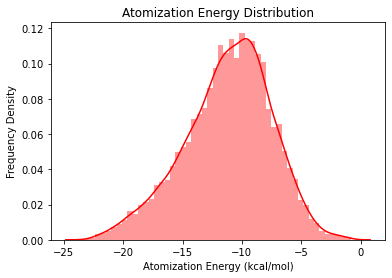

In [76]:
sns.distplot(df['Eat'], kde=True, color="r")
plt.xlabel('Atomization Energy (kcal/mol)')
plt.ylabel ('Frequency Density')
plt.title('Atomization Energy Distribution')

<AxesSubplot:xlabel='Eat'>

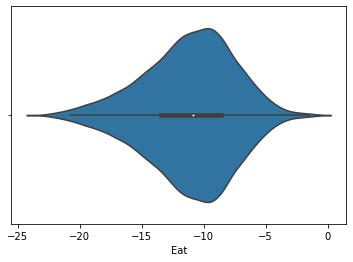

In [78]:
sns.violinplot(df['Eat'])

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,16242.000,115.715,113.199,36.858,73.517,73.517,73.517,388.023
1,16242.000,22.446,8.660,2.906,17.969,20.663,21.132,73.564
2,16242.000,20.474,7.670,0.000,16.228,18.631,20.739,66.269
3,16242.000,18.530,6.486,0.000,15.166,17.691,18.713,66.269
4,16242.000,17.169,5.513,0.000,13.744,16.020,18.298,66.269
...,...,...,...,...,...,...,...,...
1271,16242.000,0.000,0.003,0.000,0.000,0.000,0.000,0.060
1272,16242.000,0.002,0.033,0.000,0.000,0.000,0.000,0.500
1273,16242.000,0.000,0.003,0.000,0.000,0.000,0.000,0.058
1274,16242.000,0.001,0.024,0.000,0.000,0.000,0.000,0.500


In [8]:
df.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
1271    float64
1272    float64
1273    float64
1274    float64
Eat     float64
Length: 1276, dtype: object

In [9]:
X = df.drop(['Eat'], axis = 1)
Y = df['Eat']
y=Y.values
x=X.values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [11]:
x_train.shape

(14617, 1275)

In [12]:
model = Sequential()
model.add(Dense(1000, input_dim=x.shape[1],kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(50,kernel_initializer='normal'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(x_train, y_train,validation_data=(x_test,y_test),verbose=2,epochs=25)

Train on 14617 samples, validate on 1625 samples
Epoch 1/25
 - 25s - loss: 3.7027 - val_loss: 0.3753
Epoch 2/25
 - 23s - loss: 1.6220 - val_loss: 0.3739
Epoch 3/25
 - 26s - loss: 1.6593 - val_loss: 0.1436
Epoch 4/25
 - 24s - loss: 1.5329 - val_loss: 0.1734
Epoch 5/25
 - 24s - loss: 1.4713 - val_loss: 0.3411
Epoch 6/25
 - 24s - loss: 1.4907 - val_loss: 0.1635
Epoch 7/25
 - 24s - loss: 1.4325 - val_loss: 0.1982
Epoch 8/25
 - 22s - loss: 1.3746 - val_loss: 0.3506
Epoch 9/25
 - 24s - loss: 1.3740 - val_loss: 0.1772
Epoch 10/25
 - 23s - loss: 1.3143 - val_loss: 0.2648
Epoch 11/25
 - 21s - loss: 1.2589 - val_loss: 0.1115
Epoch 12/25
 - 22s - loss: 1.2477 - val_loss: 0.1708
Epoch 13/25
 - 25s - loss: 1.2114 - val_loss: 0.1674
Epoch 14/25
 - 28s - loss: 1.1990 - val_loss: 0.2714
Epoch 15/25
 - 26s - loss: 1.1647 - val_loss: 0.1238
Epoch 16/25
 - 27s - loss: 1.1396 - val_loss: 0.1294
Epoch 17/25
 - 25s - loss: 1.0944 - val_loss: 0.1910
Epoch 18/25
 - 24s - loss: 1.0694 - val_loss: 0.1236
Epoch 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              1276000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                25050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [94]:
prd=model.predict(x_test[1:16],verbose=1)

15/15 [==============================] - 0s 1ms/step


In [95]:
prd

array([[-14.734152 ],
       [-15.369026 ],
       [-12.470242 ],
       [-22.357285 ],
       [-12.953712 ],
       [ -8.810686 ],
       [ -9.641451 ],
       [ -7.9805703],
       [ -4.6884546],
       [-10.7341585],
       [-10.455816 ],
       [ -5.1036754],
       [-11.766878 ],
       [ -6.477824 ],
       [ -9.669495 ]], dtype=float32)

In [96]:
actual=y_test[1:16]

In [97]:
np.subtract(prd.T, actual) 

array([[-0.1719978 , -0.01023931,  0.41503995,  0.1735564 ,  0.52018917,
        -0.07377931, -0.19940857,  0.13498784,  0.11862378, -0.38078425,
        -0.06497212,  0.31955247, -0.3399298 ,  0.08512268, -0.15319505]])

In [18]:
model_1 = Sequential()
model_1.add(Dense(1000, input_dim=x.shape[1],kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(750,kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(500,kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(250,kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(50,kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

hist_1=model.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

Train on 14617 samples, validate on 1625 samples
Epoch 1/100
 - 24s - loss: 0.8855 - val_loss: 0.0985
Epoch 2/100
 - 23s - loss: 0.8829 - val_loss: 0.1519
Epoch 3/100
 - 22s - loss: 0.8746 - val_loss: 0.0920
Epoch 4/100
 - 22s - loss: 0.8633 - val_loss: 0.1171
Epoch 5/100
 - 23s - loss: 0.8461 - val_loss: 0.1701
Epoch 6/100
 - 23s - loss: 0.7977 - val_loss: 0.1257
Epoch 7/100
 - 23s - loss: 0.7800 - val_loss: 0.1114
Epoch 8/100
 - 22s - loss: 0.7725 - val_loss: 0.1101
Epoch 00008: early stopping


In [19]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              1276000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 750)               750750    
_________________________________________________________________
dropout_5 (Dropout)          (None, 750)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               375500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)              

In [92]:
np.subtract(prd_1.T,actual_1) 

array([[11.28717016, 11.93429403,  9.04583305, 19.67537554, 10.46331704,
         5.00659207,  6.68214269,  5.25708081,  1.66270762,  5.42696026,
         7.6376789 ,  2.34992223,  9.1389518 ,  4.81206832,  4.40071711]])

In [86]:
dataa

array([0.4496047 , 0.40465754, 0.54421624, 0.        , 0.51100545,
       0.77827347, 0.73848872, 0.81333085, 1.        , 0.68707006,
       0.68495596, 0.96523597, 0.62649748, 0.90093139, 0.73429901])

In [87]:
prd_1=model_1.predict(x_test[1:16],verbose=1)

15/15 [==============================] - 0s 1ms/step


In [91]:
prd_1

array([[-3.274984 ],
       [-3.4244928],
       [-3.8394485],
       [-2.8554654],
       [-3.0105846],
       [-3.7303147],
       [-2.7598996],
       [-2.8584774],
       [-3.1443708],
       [-4.926414 ],
       [-2.7531652],
       [-3.0733056],
       [-2.2879965],
       [-1.7508786],
       [-5.1155825]], dtype=float32)

In [84]:
actual_1=y_test[1:16]

In [22]:
np.subtract(prd_1.T, actual_1) 

array([[11.28717016, 11.93429403,  9.04583305, 19.67537554, 10.46331704,
         5.00659207,  6.68214269,  5.25708081,  1.66270762,  5.42696026,
         7.6376789 ,  2.34992223,  9.13895466,  4.81206844]])

In [23]:
model_3 = Sequential()
model_3.add(Dense(1000, input_dim=x.shape[1],kernel_initializer='normal', activation='sigmoid'))
model_3.add(Dropout(0.25))
model_3.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model_3.add(Dropout(0.25))
model_3.add(Dense(50,kernel_initializer='normal'))
model_3.add(Dropout(0.25))
model_3.add(Dense(1))
model_3.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

hist_3=model.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

Train on 14617 samples, validate on 1625 samples
Epoch 1/100
 - 23s - loss: 0.7583 - val_loss: 0.3256
Epoch 2/100
 - 22s - loss: 0.7655 - val_loss: 0.1268
Epoch 3/100
 - 22s - loss: 0.7298 - val_loss: 0.0957
Epoch 4/100
 - 23s - loss: 0.7087 - val_loss: 0.0946
Epoch 5/100
 - 22s - loss: 0.6836 - val_loss: 0.1635
Epoch 6/100
 - 22s - loss: 0.6831 - val_loss: 0.2094
Epoch 7/100
 - 22s - loss: 0.6445 - val_loss: 0.1082
Epoch 8/100
 - 22s - loss: 0.6521 - val_loss: 0.1319
Epoch 9/100
 - 23s - loss: 0.6251 - val_loss: 0.1132
Epoch 00009: early stopping


In [24]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              1276000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [25]:
prd_3=model_3.predict(x_test[1:16])


In [26]:
prd_3

array([[-0.10026333],
       [-0.13563022],
       [-0.14711362],
       [ 0.09840055],
       [-0.14853713],
       [-0.05483326],
       [ 0.19326134],
       [-0.11709094],
       [-0.02504596],
       [-0.19588226],
       [ 0.00975659],
       [-0.08045825],
       [ 0.09709512],
       [-0.02699101],
       [-0.02038819]], dtype=float32)

In [27]:
actual_3=y_test[1:16]

In [28]:
actual_3

array([-14.56215404, -15.35878687, -12.8852815 , -22.53084095,
       -13.47390163,  -8.7369068 ,  -9.44204231,  -8.11555816,
        -4.80707841, -10.35337427, -10.39084415,  -5.42322784,
       -11.42694833,  -6.56294689,  -9.51629958])

In [36]:
model_2 = Sequential()
model_2.add(Dense(1000, input_dim=x.shape[1],kernel_initializer='normal', activation='sigmoid'))
model_2.add(Dropout(0.25))
model_2.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model_2.add(Dropout(0.25))
model_2.add(Dense(100,kernel_initializer='normal'))
model_2.add(Dropout(0.25))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')

hist_2=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=20)

Train on 14617 samples, validate on 1625 samples
Epoch 1/20
14617/14617 [==============================] - 24s 2ms/step - loss: 0.4402 - val_loss: 0.1584
Epoch 2/20
14617/14617 [==============================] - 24s 2ms/step - loss: 0.4257 - val_loss: 0.0747
Epoch 3/20
14617/14617 [==============================] - 24s 2ms/step - loss: 0.4285 - val_loss: 0.1321
Epoch 4/20
14617/14617 [==============================] - 25s 2ms/step - loss: 0.4230 - val_loss: 0.0671
Epoch 5/20
14617/14617 [==============================] - 25s 2ms/step - loss: 0.4135 - val_loss: 0.0857
Epoch 6/20
14617/14617 [==============================] - 24s 2ms/step - loss: 0.4007 - val_loss: 0.0746
Epoch 7/20
14617/14617 [==============================] - 23s 2ms/step - loss: 0.4121 - val_loss: 0.0899
Epoch 8/20
14617/14617 [==============================] - 24s 2ms/step - loss: 0.4072 - val_loss: 0.1175
Epoch 9/20
14617/14617 [==============================] - 26s 2ms/step - loss: 0.3990 - val_loss: 0.0745
Epoch 

In [55]:
dat=y_test[1:16].reshape(15,1)


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dat)
print(scaled)

[[0.4496047 ]
 [0.40465754]
 [0.54421624]
 [0.        ]
 [0.51100545]
 [0.77827347]
 [0.73848872]
 [0.81333085]
 [1.        ]
 [0.68707006]
 [0.68495596]
 [0.96523597]
 [0.62649748]
 [0.90093139]
 [0.73429901]]


In [59]:
dataa=scaled.reshape(15,)

In [63]:
actual_3=model_3.predict(x_test[1:16])

In [70]:
np.subtract(actual_3.T,dataa) 

array([[-0.54986803, -0.54028776, -0.69132986,  0.09840055, -0.65954258,
        -0.83310673, -0.54522738, -0.93042179, -1.02504596, -0.88295233,
        -0.67519937, -1.04569422, -0.52940237, -0.9279224 , -0.7546872 ]])

In [73]:
actual_2=model_2.predict(x_test[1:16])

In [74]:
np.subtract(actual_2.T,dataa) 

array([[ 0.39339393,  0.33737279,  0.26124838,  0.74536288,  0.26380778,
        -0.16792036,  0.06002815, -0.23967405, -0.46827465,  0.12448711,
        -0.04215211, -0.30826165,  0.07893934, -0.3177813 , -0.01319618]])

In [37]:
hist_2.history["val_loss"]

[0.1583997623553643,
 0.07471903070578208,
 0.13214974164045773,
 0.06710048332122656,
 0.08574392459484247,
 0.07460550971214588,
 0.0899305561047334,
 0.11745479286634004,
 0.07451509173099811,
 0.15226829154674823,
 0.06312578431459574,
 0.07556407772577727,
 0.10133377452080067,
 0.06890777625487401,
 0.0784329652098509,
 0.07703355907018368,
 0.08079624732641073,
 0.07734414866795906,
 0.0698376420552914,
 0.09442769874746983]

In [38]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              1276000   
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

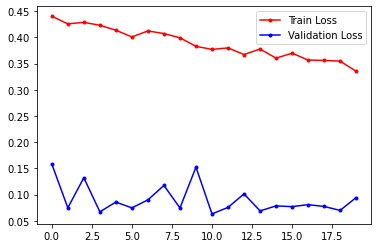

In [79]:
fig, ax = plt.subplots()
ax.plot(hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

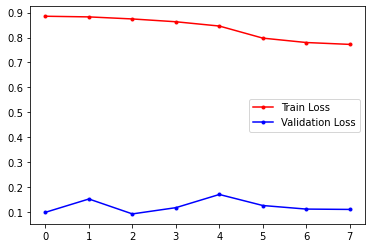

In [80]:
fig, ax = plt.subplots()
ax.plot(hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

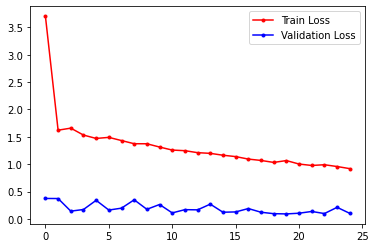

In [81]:
fig, ax = plt.subplots()
ax.plot(hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

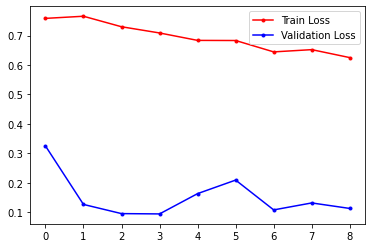

In [82]:
fig, ax = plt.subplots()
ax.plot(hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()